# **CREDIT SCORE CLASSIFICATION MODEL DEVELOPMENT**

![alt the text here](https://img.freepik.com/free-vector/hand-drawn-credit-score-concept_23-2149164575.jpg?w=900&t=st=1725263174~exp=1725263774~hmac=197f3bc36eb5de8aa69feb5e64d9e8d59bbc6d5c7073f6ecda5fba4e53e791f0)

**IMPORTING THE FEATURED DATA SET**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
data=pd.read_csv('/content/NEW_FEATURE_DATASET(11R).CSV')
data.head()

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0,22.083333
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0,22.166667
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0,22.250000
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0,22.333333
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0,22.416667


In [3]:
data.shape

(100000, 11)



*   The data set is very large,so it is very difficult to tune this large data in colab.so i spliting my data for modeling . taking first 8000 rows for modeling and tunning,then add remining to the model for final model



In [4]:
data = data[0:80000]

In [5]:
data

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0,22.083333
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0,22.166667
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0,22.250000
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0,22.333333
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0,22.416667
...,...,...,...,...,...,...,...,...,...,...,...
79995,51.0,7895.123333,16.0,24.0,17.0,39.820959,368.0,1,559.569595,2,30.666667
79996,51.0,7895.123333,16.0,26.0,17.0,35.094456,369.0,0,712.634248,2,30.750000
79997,52.0,7895.123333,16.0,24.0,17.0,29.232456,370.0,4,251.036700,2,30.833333
79998,52.0,7895.123333,16.0,24.0,17.0,37.514992,371.0,4,641.246055,2,30.916667


In [6]:
data.shape

(80000, 11)

RANDOM FOREST CLASSIFIER

In [7]:
y=data['Credit_Score']
x=data.drop(['Credit_Score'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
y_prediction_rf=rf_clf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix,accuracy_score


In [13]:
print(confusion_matrix(y_test,y_prediction_rf))


[[1933   25  924]
 [  72 3669  947]
 [ 598 1067 6765]]


In [14]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction_rf, average='weighted')
recall = recall_score(y_test, y_prediction_rf, average='weighted')
f1 = f1_score(y_test, y_prediction_rf, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2882
           1       0.77      0.78      0.78      4688
           2       0.78      0.80      0.79      8430

    accuracy                           0.77     16000
   macro avg       0.77      0.75      0.76     16000
weighted avg       0.77      0.77      0.77     16000



# **CROSS VALIDATION**



*   **appling kfold cross validation**



In [15]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=10)



*  **printing the folds**



In [16]:
for train_index,test_index in kf.split(x):
  print('train_index:',train_index)
  print('test_index:',test_index)

train_index: [ 8000  8001  8002 ... 79997 79998 79999]
test_index: [   0    1    2 ... 7997 7998 7999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [ 8000  8001  8002 ... 15997 15998 15999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [16000 16001 16002 ... 23997 23998 23999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [24000 24001 24002 ... 31997 31998 31999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [32000 32001 32002 ... 39997 39998 39999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [40000 40001 40002 ... 47997 47998 47999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [48000 48001 48002 ... 55997 55998 55999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [56000 56001 56002 ... 63997 63998 63999]
train_index: [    0     1     2 ... 79997 79998 79999]
test_index: [64000 64001 64002 ... 71997 71998 71999]
train_index: [    0     1



*   **calculating the cross validation score for the fold**



In [17]:
score=cross_val_score(rf_clf,x,y,cv=kf)
print('cross validation scores are {}'.format(score))

cross validation scores are [0.6295   0.6185   0.640375 0.63225  0.63125  0.643875 0.629    0.63125
 0.619    0.62475 ]




*  **getting the avg score**



In [18]:
score=cross_val_score(rf_clf,x,y,cv=kf)
print('averagecross validation scores: {}'.format(score.mean()))

averagecross validation scores: 0.6289750000000001


# **TUNNIG**

In [19]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Set max_depth range between 3 and 10 (as per the ideal range)
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth=val), x, y, cv=kf, scoring='accuracy')
    print(f'average score({val}): {score.mean():.3f}')


average score(3): 0.615
average score(4): 0.632
average score(5): 0.636
average score(6): 0.638
average score(7): 0.643
average score(8): 0.642
average score(9): 0.638
average score(10): 0.633


In [20]:
parameter = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2']
}

**importing grid search cv**

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
#importing random forest classifier

from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    parameter, cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [ ]:
grid_result=grid_search.fit(X_train,y_train)

In [ ]:
# to see the best combination of parameters

print('Best_params',grid_result.best_params_)
print('Best_score',grid_result.best_score_)

Best_params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best_score 0.78546875


In [23]:

# Define the RandomForestClassifier with the specified parameters
rf_clf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=20,            # Maximum depth of each tree
    max_features='sqrt',     # Consider the square root of the number of features for the best split
    min_samples_leaf=1,      # Minimum number of samples required at a leaf node
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    random_state=42          # To ensure reproducibility
)

# Fit the model with training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [24]:
y_prediction_rf=rf_clf.predict(X_test)

In [25]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction_rf, average='weighted')
recall = recall_score(y_test, y_prediction_rf, average='weighted')
f1 = f1_score(y_test, y_prediction_rf, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67      2882
           1       0.76      0.75      0.76      4688
           2       0.77      0.79      0.78      8430

    accuracy                           0.76     16000
   macro avg       0.74      0.73      0.74     16000
weighted avg       0.75      0.76      0.75     16000



**Select 10000 Rows from the Last 20000 Rows:**



*    Randomly selecting 10000 rows from the last 20000 rows



In [26]:
sample_indices = np.random.choice(X_test.index, 10000, replace=False)
X_eval = X_test.loc[sample_indices]        # X_test does not include 'Credit_Score'
y_eval = y_test.loc[sample_indices]        # y_test is where 'Credit_Score' is stored

print("Selected 10000 rows from the last 20000 rows for evaluation.")

Selected 10000 rows from the last 20000 rows for evaluation.


**Evaluation Function to Predict on the 100 Rows:**

In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Define the evaluation function
def evaluate_model(rf_clf, X_test, y_test, output_file='inference.xlsx'):
    # Predict the labels for the test set
    y_pred = rf_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })

    # Save results to an Excel file
    with pd.ExcelWriter(output_file) as writer:
        results_df.to_excel(writer, sheet_name='Predictions', index=False)
        pd.DataFrame([{'Accuracy': accuracy}]).to_excel(writer, sheet_name='Accuracy', index=False)
        pd.DataFrame(class_report).transpose().to_excel(writer, sheet_name='Classification Report')

    print(f'Inference results saved to {output_file}')

# Example usage
# Assuming rf_clf is your trained model, and X_test, y_test are the test data
evaluate_model(rf_clf, X_eval, y_eval)


Accuracy: 0.76
Inference results saved to inference.xlsx


** Retrain the Model with Additional Data**

In [29]:
# Combine the initial 8000 rows with the 100 selected rows for retraining
X_combined = pd.concat([X_train, X_eval])
y_combined = pd.concat([y_train, y_eval])

# Retrain the model with the combined data
rf_clf.fit(X_combined, y_combined)
print("Model retrained with the additional 10000 rows.")

Model retrained with the additional 10000 rows.


In [30]:
import pickle

# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_clf, model_file)

print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


# **Model Interpretability: Feature Importance Analysis**

In [31]:
import matplotlib.pyplot as plt
import numpy as np



*    Get feature importances from the trained Random Forest model



In [32]:
feature_importances = rf_clf.feature_importances_



*    Get the feature names (assuming your DataFrame columns are used for training)



In [33]:
feature_names = X_train.columns



*   Create a DataFrame for visualization



In [34]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})



*    Sort by importance for better visualization



In [35]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)



*   Plot the feature importances



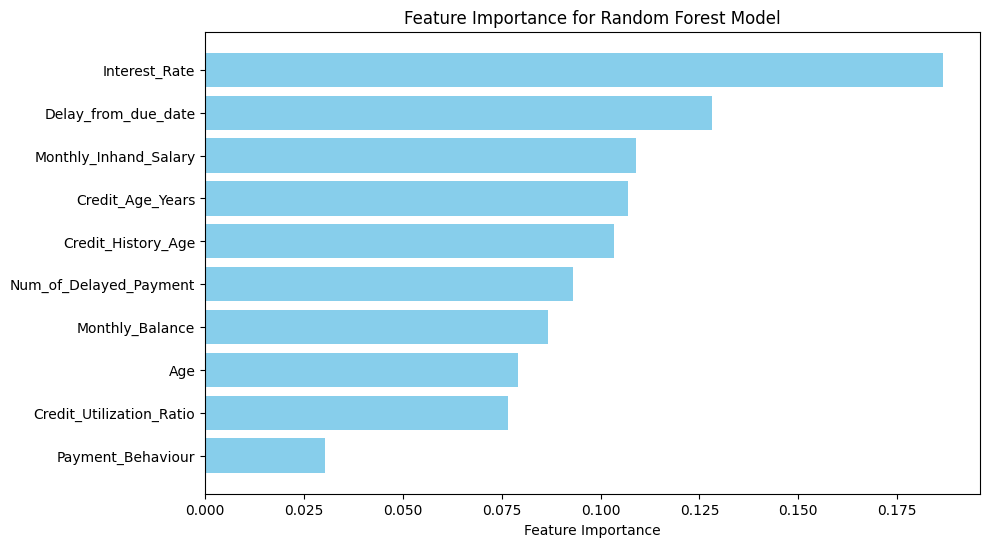

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()



**1.   Top Features:**





*   Interest Rate: The most important feature in the model. This makes sense because the interest rate directly influences a person's ability to pay back loans, which can heavily impact their credit score.

*   Credit History Age: This feature is the second most important. A longer credit history often indicates that the individual has had more time to demonstrate responsible credit behavior, leading to a better credit score.



*   Credit Age (Years): Another key feature, as the age of credit is a strong predictor of reliability. The older an individual's credit accounts, the more data there is to evaluate their creditworthiness.

*   Delay from Due Date: This feature measures how often payments are delayed beyond the due date. Late payments are a strong negative indicator of creditworthiness, so it’s natural that this feature would have high importance.









**2.   Medium Importance Features:**





*   Monthly Inhand Salary: The salary influences an individual's ability to make payments, so it's a significant factor in determining credit risk.

*   Monthly Balance: This feature measures the remaining balance after expenses, which may indicate whether a person is managing their finances well.

*   Number of Delayed Payments: The more often someone has delayed payments, the worse their credit score is likely to be. This feature directly affects the score.


*  Age: Older individuals often have longer credit histories and more data to assess their creditworthiness, which is why age has medium importance.





**3. Lower Importance Features:**





*   Credit Utilization Ratio: While it is still an important feature, it's slightly lower in importance. This measures how much of the available credit is being used, which is a key factor for credit scoring, but in this case, not as significant as other features.

*   Payment Behavior: Although it's lower in the ranking, payment behavior can still provide some insights into a person's financial discipline and their ability to pay back loans.



# **Performance Validation: Validate Model on the Testing Dataset**

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



*    Make predictions on the test set



In [38]:
y_pred = rf_clf.predict(X_test)



*    Calculate accuracy



In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89




*    Print classification report (includes precision, recall, F1-score)



In [40]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      2882
           1       0.90      0.87      0.89      4688
           2       0.88      0.91      0.90      8430

    accuracy                           0.89     16000
   macro avg       0.89      0.87      0.88     16000
weighted avg       0.89      0.89      0.89     16000





*   Display the confusion matrix



In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2370   16  496]
 [  76 4095  517]
 [ 266  453 7711]]




*    Optional: Visualize confusion matrix using seaborn heatmap



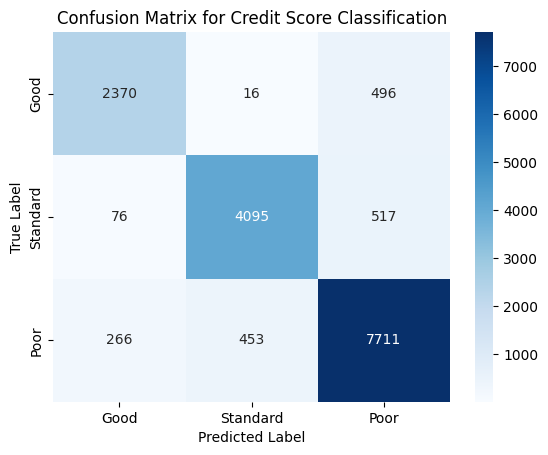

In [42]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Standard', 'Poor'], yticklabels=['Good', 'Standard', 'Poor'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Credit Score Classification')
plt.show()

**True Positive (Correct Predictions):**



*   Good : 2370 instances were correctly predicted as "Good."

*   Standard : 4095 instances were correctly predicted as "Standard."


*   poor : 7711 instances were correctly predicted as "Poor."





**False Positive (Incorrect Predictions):**




*   Good predicted as Poor: 266 instances.

*   Good predicted as Standard: 16 instance.

*   Standard predicted as Poor: 517 instances.
*   Standard predicted as Good: 76 instances.


*   Poor predicted as Standard: 453 instances.


*   Poor predicted as Good: 496 instances.










# **Threshold Selection: Adjust Classification Thresholds**

By default, Random Forest classifiers use a threshold of 0.5 for binary or multi-class classification. However, we can adjust this threshold based on business needs (e.g., if we want to be more cautious in classifying someone as having a "Poor" credit score).

To change the threshold, we can use predict_proba to get the probabilities for each class and adjust the threshold accordingly.

In [43]:
#Get the predicted probabilities for the test set
y_probs = rf_clf.predict_proba(X_test)

In [44]:
# Extract the probabilities for the "Poor" class (assuming it's the 3rd class in the dataset)
# You can check class labels using: rf_clf.classes_
poor_class_probs = y_probs[:, 2]  # Assuming the 3rd column corresponds to 'Poor' class

In [45]:
# Set a custom threshold (e.g., 0.6 instead of 0.5)
threshold = 0.6


*  Adjust predictions based on the new threshold




In [46]:
y_pred_adjusted = np.where(poor_class_probs > threshold, 1, y_pred)  # Modify this for other classes as needed

In [47]:
# Validate the adjusted predictions
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy with threshold {threshold}: {accuracy_adjusted:.2f}")

Accuracy with threshold 0.6: 0.47


In [48]:
# Optional: Print the classification report and confusion matrix with the adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      2882
           1       0.36      0.91      0.52      4688
           2       0.59      0.11      0.18      8430

    accuracy                           0.47     16000
   macro avg       0.61      0.61      0.52     16000
weighted avg       0.58      0.47      0.40     16000



In [49]:
import pickle

# Save the model using pickle
with open('random_forest_model.FINAL.pkl', 'wb') as model_file:
    pickle.dump(rf_clf, model_file)

print("Model saved as random_forest_model.FINAL.pkl")

Model saved as random_forest_model.FINAL.pkl
